<a href="https://colab.research.google.com/github/Eman-Adly/Eman/blob/main/graduation_project_f1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, accuracy_score

In [ ]:
df = pd.read_csv("/content/Student_performance_data _.csv")

In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 280.4 KB
None


In [ ]:
print(df.describe())


         StudentID          Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000   
mean   2196.500000    16.468645     0.510870     0.877508           1.746237   
std     690.655244     1.123798     0.499986     1.028476           1.000411   
min    1001.000000    15.000000     0.000000     0.000000           0.000000   
25%    1598.750000    15.000000     0.000000     0.000000           1.000000   
50%    2196.500000    16.000000     1.000000     0.000000           2.000000   
75%    2794.250000    17.000000     1.000000     2.000000           2.000000   
max    3392.000000    18.000000     1.000000     3.000000           4.000000   

       StudyTimeWeekly     Absences     Tutoring  ParentalSupport  \
count      2392.000000  2392.000000  2392.000000      2392.000000   
mean          9.771992    14.541388     0.301421         2.122074   
std           5.652774     8.467417     0.458971         1.122813   
min

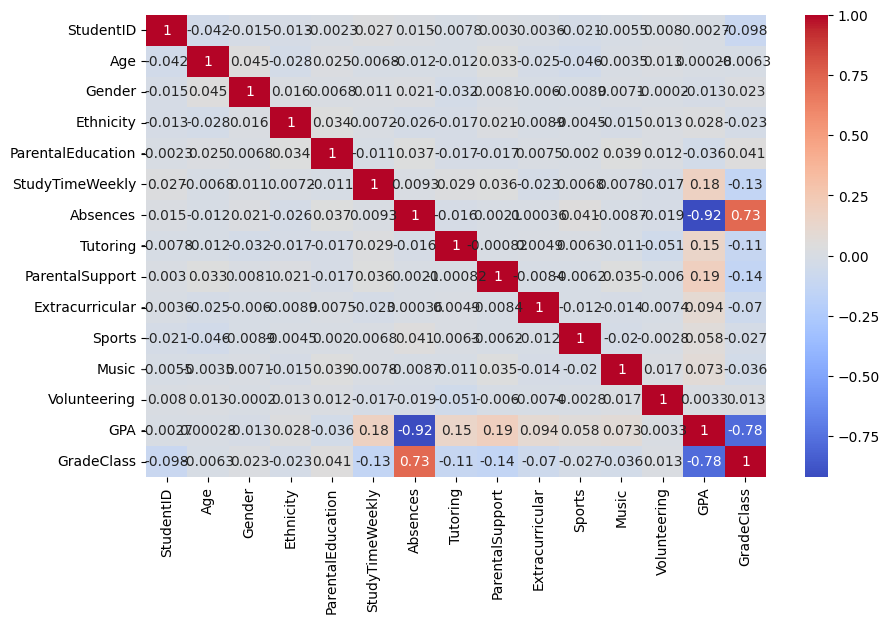

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
X = df.drop(columns=["GPA", "GradeClass"])  # المتغيرات المستقلة
y_gpa = df["GPA"]  # المتغير المستهدف (المعدل التراكمي)
y_class = df["GradeClass"].astype(int)  # تحويل التصنيف لنوع صحيح


In [ ]:
X_train, X_test, y_train_gpa, y_test_gpa = train_test_split(X, y_gpa, test_size=0.2, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_class, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train_gpa)
y_pred_gpa = regressor.predict(X_test_scaled)
print(f"MSE: {mean_squared_error(y_test_gpa, y_pred_gpa)}")

MSE: 0.039029654365343794


In [ ]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_cls, y_train_cls)
y_pred_cls = classifier.predict(X_test_cls)
print(f"classification accuracy: {accuracy_score(y_test_cls, y_pred_cls)}")

classification accuracy: 0.7014613778705637


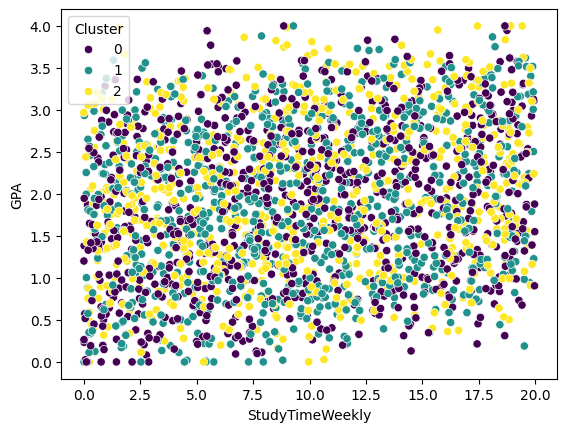

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_scaled)
df['Cluster'] = kmeans.predict(scaler.transform(X))
sns.scatterplot(x=df['StudyTimeWeekly'], y=df['GPA'], hue=df['Cluster'], palette='viridis')
plt.show()

In [ ]:
def generate_recommendation(study_time, absences, tutoring):
    if study_time < 5:
        return "يُوصى بزيادة عدد ساعات الدراسة الأسبوعية."
    elif absences > 15:
        return "حضور الفصول الدراسية ضروري لتحسين الأداء."
    elif tutoring == 0:
        return "الدروس الخصوصية قد تساعد في تحسين الفهم."
    else:
        return "استمر في العمل الجيد!"

In [ ]:
df['Recommendation'] = df.apply(lambda row: generate_recommendation(row['StudyTimeWeekly'], row['Absences'], row['Tutoring']), axis=1)
print(df[['GPA', 'Recommendation']].head(10))

        GPA                             Recommendation
0  2.929196                      استمر في العمل الجيد!
1  3.042915   الدروس الخصوصية قد تساعد في تحسين الفهم.
2  0.112602  يُوصى بزيادة عدد ساعات الدراسة الأسبوعية.
3  2.054218   الدروس الخصوصية قد تساعد في تحسين الفهم.
4  1.288061  يُوصى بزيادة عدد ساعات الدراسة الأسبوعية.
5  3.084184   الدروس الخصوصية قد تساعد في تحسين الفهم.
6  2.748237   الدروس الخصوصية قد تساعد في تحسين الفهم.
7  1.360143  حضور الفصول الدراسية ضروري لتحسين الأداء.
8  2.896819  يُوصى بزيادة عدد ساعات الدراسة الأسبوعية.
9  3.573474   الدروس الخصوصية قد تساعد في تحسين الفهم.


In [ ]:
df['Recommendation'] = df.apply(lambda row: generate_recommendation(row['StudyTimeWeekly'], row['Absences'], row['Tutoring']), axis=1)
print(df[['GPA', 'Recommendation']].tail(5))

           GPA                             Recommendation
2387  3.455509   الدروس الخصوصية قد تساعد في تحسين الفهم.
2388  3.279150                      استمر في العمل الجيد!
2389  1.142333  حضور الفصول الدراسية ضروري لتحسين الأداء.
2390  1.803297  حضور الفصول الدراسية ضروري لتحسين الأداء.
2391  2.140014   الدروس الخصوصية قد تساعد في تحسين الفهم.
